<a href="https://colab.research.google.com/github/xmpuspus/Lectures/blob/master/notebooks/IntroMultiLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Mix Model  

- Market Mix Modeling (MMM) is a technique which helps in quantifying the impact of several marketing inputs on sales or Market Share. The purpose of using MMM is to understand how much each marketing input contributes to sales, and how much to spend on each marketing input.  


- MMM helps in the ascertaining the effectiveness of each marketing input in terms of Return on Investment. In other words, a marketing input with higher return on Investment (ROI) is more effective as a medium than a marketing input with a lower ROI.  


- MMM uses the Regression technique and the analysis performed through Regression is further used for extracting key information/insights.  

Reference: [link](https://towardsdatascience.com/market-mix-modeling-mmm-101-3d094df976f9)

In [0]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data

from sklearn.linear_model import LinearRegression # linear regression package

## Objective: Determine Impact of Features to Sales using Contribution Chart   
Contribution Chart is a visual way of representing what marketing inputs drive sales and how much is the impact of each marketing input.  
It always helps to ease the cognitive burden off your time-starved clients by representing market reality in a visual way.

## Load Data

In [0]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

## Modeling

In [0]:
# Define Features
features = ['TV', 'newspaper']

# Set X
X = data[features]

# Set y
y = data['sales']

# Initialize model
model = LinearRegression() 

# Fit Model
model.fit(X, y)

# get coefficients
coefficients = model.coef_

# get intercept
intercept = model.intercept_

# calculate the R-squared
rsquared = model.score(X, y)


## Results

In [0]:
# intercept
intercept

5.7749479679116344

In [0]:
# metric
rsquared

0.6458354938293271

Results show that the $R^2 = 0.646$ which basically tells us that the model, in a way, is able predict *Sales*.  


In [0]:
# coefficients
coefficients

array([0.04690121, 0.04421942])

### Equation of Line . 
The equation of the red line is just: 

$\begin {equation}
Sales = 0.04690121 * TV + 0.04421942 * newspaper + 5.774947
\end {equation}$  

### Interpreting the Coefficients
- For a given amount of Radio and Newspaper ad spending, an **increase of 1000 dollars in TV ad spending** is associated with an **increase in Sales of 46 widgets** (assuming everything else is unchanged).

- For a given amount of TV and Radio ad spending, a **Increase of 1000 dollars in newspaper ad spending** is associated with an **increase in Sales of 44 widget**.

### Bonus: Plot Contribution Chart

In [0]:
# put coefficients into dataframe
# pair the feature names with the coefficients
coefficients_pd = pd.DataFrame((list(zip(features, model.coef_ * 100))), columns = ['Features', 'Coefficients'])

# print table of coefficients for contribution chart
coefficients_pd


,Features,Coefficients
0,TV,4.690121
1,newspaper,4.421942


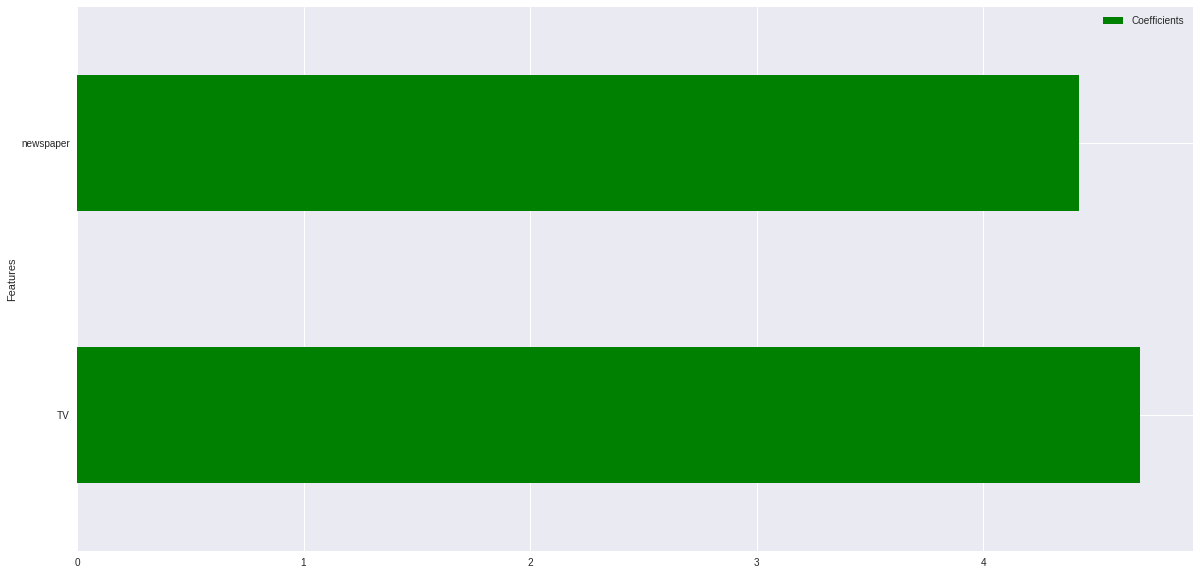

In [0]:
# Plot Contribution chart
coefficients_pd.set_index('Features').plot(kind = 'barh', color = 'g')

# Exercise: Construct Contribution Chart
- use pairs or all features *TV*, *Radio* and *newspaper*,
- follow steps outlined above to setup the regression analysis,
- output the coefficients,
- explain the results.